In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
pd.set_option('max_rows', 5)
%matplotlib inline

## 対応「あり」「なし」とは
---
同じ対象に対して異なる条件で取得したデータを「対応あり」、異なる対象に対して取得したデータを「対応なし」という。

<table class="text-center border">
    <tr>
        <th class="border-none background-default" colspan="3">対応あり</th>
    </tr>
    <tr>
        <td></td>
        <td>課外授業実施前の成績</td>
        <td>課外授業実施後の成績</td>
    </tr>
    <tr>
        <td>クラス1生徒A</td>
        <td>80</td>
        <td>85</td>
    </tr>
    <tr>
        <td>クラス1生徒B</td>
        <td>60</td>
        <td>69</td>
    </tr>
    <tr>
        <td>クラス1生徒C</td>
        <td>90</td>
        <td>87</td>
    </tr>
</table>

<table class="text-center border">
    <tr>
        <th class="border-none background-default" colspan="4">対応なし</th>
    </tr>
    <tr>
        <td></td>
        <td>課外授業実施後の成績</td>
        <td></td>
        <td>課外授業実施後の成績</td>
    </tr>
    <tr>
        <td>クラス1生徒A</td>
        <td>85</td>
        <td>クラス2生徒D</td>
        <td>75</td>
    </tr>
    <tr>
        <td>クラス1生徒B</td>
        <td>69</td>
        <td>クラス2生徒E</td>
        <td>95</td>
    </tr>
    <tr>
        <td>クラス1生徒C</td>
        <td>87</td>
    </tr>
</table>

## サンプル数 (標本数) とは
---
性質 (例えば母平均など) の異なる 2 種のデータを 2 標本またはサンプル数が 2 であるという。 2 標本の比較を扱う問題を 2 標本問題という。  
サンプル数はサンプルサイズ (データセットの大きさ) と間違いやすいが、複数の標本を扱う場合以外はサンプルサイズのことをサンプル数ということも多いので、文脈から判断する。

## 対応のあるt検定 (対応のある2群の平均の差の検定)
---
対応ある 2 群のデータ $X,Y$ で、対応する値同士の差を表すデータ $D$ に対して [$t$ 検定](t_test.ipynb)を行う。

2 つの確率分布 $X,Y$ の平均・分散をそれぞれ $\mu _{X} ,\mu _{Y}$ ・ $\sigma ^{2}_{X} ,\sigma ^{2}_{Y}$ とすると、 $X-Y$ の平均・分散は $\mu _{X} -\mu _{Y}$ ・ $\sigma ^{2}_{X} +\sigma ^{2}_{Y}$ になる。 ([平均と分散の性質](mean_and_variance.ipynb)参照)  
さらに $X,Y$ が共に正規分布なら、正規分布の性質から $D$ も正規分布。 $X,Y$ が正規分布でなくても、サンプルサイズ $n$ が大きく[中心極限定理](../beginner/population_mean_estimation.ipynb#%E4%B8%AD%E5%BF%83%E6%A5%B5%E9%99%90%E5%AE%9A%E7%90%86-(central-limit-theorem))が成り立つ場合には $D$ の平均 $\mu _{D}$ は正規分布で近似可能。
そこで、この場合には統計量 $
\begin{align}
    t & =\frac
        {\overline{D} -\mu _{D}}
        {\sqrt{
            {\displaystyle \frac
                {s^{2}_{D}}
                {n}
            }
        }}
\end{align}
$ が自由度 $n-1$ の $t$ 分布に従うことを利用して検定する。

###### 練習問題

データセット`data`の`before`と`after`の差を表すデータセット`diff`を作成し、施策の効果があるかどうかを検定するための統計量 $t$ を求める。

In [2]:
size = 50
np.random.seed(1234)
X = stats.truncnorm(0, 100, loc=70, scale=10).rvs(size=size)
Y = X + stats.norm(loc=1, scale=3).rvs(size=size)
Y = np.where(np.where(Y <= 0, 0, Y) >= 100, 100, Y)
data = pd.DataFrame(dict(before=X, after=Y), dtype=int)
print('data')
display(data)

data


,before,after
0,72.423867,74.167243
1,78.817884,77.126414
...,...,...
48,74.256930,72.173378
49,76.791652,76.037498


In [3]:
diff = data['after'] - data['before']
t = (diff.mean() - 0) / np.sqrt(diff.var(ddof=1) / diff.index.size)
t

2.3857663966532603

###### 練習問題

この検定に対応する帰無分布の確率密度関数と、上で求めた $t$ 統計量の位置をグラフ表示する。

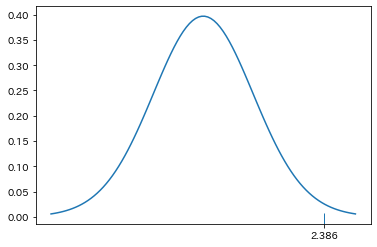

In [4]:
x = np.linspace(-3, 3, 100)
null_dist = stats.t(diff.index.size - 1)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

###### 練習問題

上で求めた検定統計量 $𝑡$ に対応した $p$ 値を求める。

In [5]:
# 施作の効果があると言えるためにはbefore<afterでなければならないので、右側検定を用いる
p = null_dist.sf(t)
p

0.010476528585939763

In [6]:
stats.ttest_1samp(diff, 0).pvalue / 2

0.010476528585939763

対応のある 2 群の比の差の検定には[マクネマー検定](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.runs.mcnemar.html)があるが、ここでは扱わない。

## Pythonでの対応のある2群の平均の差の検定の実行方法
---
`scipy.stats.ttest_rel`を使用する。  
常に両側検定になるので、片側検定は p 値を $\displaystyle \frac{1}{2}$ にする。

In [7]:
stats.ttest_rel??

In [8]:
stats.ttest_rel(data['after'], data['before'])

Ttest_relResult(statistic=2.3857663966532603, pvalue=0.020953057171879525)